# 机器学习系列(1)_逻辑回归初步 

作者：寒小阳 && 龙心尘
时间：2015年10月。
出处：http://blog.csdn.net/han_xiaoyang/article/details/49123419。
声明：版权所有，转载请注明出处，谢谢。

1、总述

逻辑回归是应用非常广泛的一个分类机器学习算法，它**将数据拟合到一个logit函数(或者叫做logistic函数)中**，从而能够完成**对事件发生的概率进行预测**。

>说逻辑回归，我们得追溯到线性回归，想必大家对线性回归都有一定的了解，即对于多维空间中存在的样本点，我们用特征的线性组合去拟合空间中点的分布和轨迹。如下图所示：

<img src="http://img.blog.csdn.net/20151014123301565?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center" width=436 align=left />

线性回归能对连续值结果进行预测，而现实生活中常见的另外一类问题是，分类问题。最简单的情况是是与否的二分类问题。比如说医生需要判断病人是否生病，银行要判断一个人的信用程度是否达到可以给他发信用卡的程度，邮件收件箱要自动对邮件分类为正常邮件和垃圾邮件等等。

>既然能够用线性回归预测出连续值结果，那根据结果设定一个阈值是不是就可以解决这个问题了呢？事实是，对于很标准的情况，确实可以的，这里我们套用Andrew Ng老师的课件中的例子，下图中X为数据点肿瘤的大小，Y为观测结果是否是恶性肿瘤。通过构建线性回归模型，如hθ(x)所示，构建线性回归模型后，我们设定一个阈值0.5，预测hθ(x)≥0.5的这些点为恶性肿瘤，而hθ(x)<0.5为良性肿瘤。

<img src='http://img.blog.csdn.net/20151014123518573?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=456  />

但很多实际的情况下，我们需要学习的分类数据并没有这么精准，比如说上述例子中突然有一个不按套路出牌的数据点出现，如下图所示：
<img src='http://img.blog.csdn.net/20151014123606004?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center',width=456 />

你看，现在你再设定0.5，这个***判定阈值就失效了***，而现实生活的分类问题的数据，会比例子中这个更为复杂，而这个时候我们借助于***线性回归+阈值***的方式，已经很难完成一个***鲁棒性很好***的分类器了。

在这样的场景下，逻辑回归就诞生了。
>它的核心思想是，如果***线性回归的结果输出***是一个***连续值***，而***值的范围是无法限定的***，那我们有没有办法把这个***结果值映射***为可以帮助我们判断的结果呢。

>如果输出结果是 (0,1) 的一个***概率值***，这个问题就很清楚了。我们在数学上找了一圈，还真就找着这样一个简单的函数了，就是很神奇的***sigmoid函数***(如下)：
<img src='http://img.blog.csdn.net/20151014123727818?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center'  width=123 />


如果把sigmoid函数图像画出来，是如下的样子：<img src='http://img.blog.csdn.net/20151014124034991?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center'  width=456 />

从函数图上可以看出，函数y=g(z)在z=0的时候取值为1/2，而随着z逐渐变小，函数值趋于0，z逐渐变大的同时函数值逐渐趋于1，而这正是一个概率的范围。
所以我们定义线性回归的预测函数为Y=WTX，那么逻辑回归的输出Y= g(WTX)，其中y=g(z)函数正是上述sigmoid函数(或者简单叫做S形函数)。

##  2、判定边界
我们现在再来看看，为什么逻辑回归能够解决分类问题。这里引入一个概念，叫做***判定边界***，可以理解为是用以***对不同类别的数据分割的边界***，边界的两旁应该是不同类别的数据。

从二维直角坐标系中，举几个例子，大概是如下这个样子：
<img src='http://img.blog.csdn.net/20151014124124641?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=456  />

<img src='http://img.blog.csdn.net/20151014124156527?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=456  />
<img src='http://img.blog.csdn.net/20151014124241795?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=456  />

上述三幅图中的红绿样本点为不同类别的样本，而我们划出的线，不管是直线、圆或者是曲线，都能比较好地将图中的两类样本分割开来。这就是我们的判定边界，下面我们来看看，逻辑回归是如何根据样本点获得这些判定边界的。

我们依旧借用Andrew Ng教授的课程中部分例子来讲述这个问题。

>回到sigmoid函数，我们发现：  
当g(z)≥0.5时, z≥0;

>对于hθ(x)=g(θTX)≥0.5, 则θTX≥0, 此时意味着预估y=1;

>反之，当预测y = 0时，θTX<0;

所以我们认为***θTX = 0 ***是一个决策边界
当它大于0或小于0时，逻辑回归模型分别预测不同的分类结果。

先看第一个例子hθ(x)=g(θ0+θ1X1+θ2X2)，其中θ0 ,θ1 ,θ2分别取-3, 1, 1。则当−3+X1+X2≥0时, y = 1; 则X1+X2=3是一个决策边界，图形表示如下，刚好把图上的两类点区分开来：
<img src='http://img.blog.csdn.net/20151014124638710?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=226 />

例1只是一个线性的决策边界，当hθ(x)更复杂的时候，我们可以得到非线性的决策边界，例如：
<img src='http://img.blog.csdn.net/20151014124838937?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width=234 />
这时当x12+x22≥1时，我们判定y=1，这时的决策边界是一个圆形，如下图所示：
<img src='http://img.blog.csdn.net/20151014124912098?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center' width 234 />
>所以我们发现，理论上说，只要我们的hθ(x)设计足够合理，准确的说是g(θTx)中θTx足够复杂，我们能在不同的情形下，拟合出不同的判定边界，从而把不同的样本点分隔开来。


## 3.代价函数与梯度下降
我们通过对判定边界的说明，知道会有***合适的参数θ***使得***θTx=0成为很好的分类判定边界***，那么问题就来了，我们如何***判定我们的参数θ是否合适***，有多合适呢？更进一步，我们有没有办法去***求得这样的合适参数θ***呢？

这就是我们要提到的***代价函数与梯度下降了***。

### 代价函数Cost Function
其实是一种***衡量我们在这组参数***下***预估的结果***和***实际结果差距***的函数，比如说线性回归的代价函数定义为:
<img width="242" height="71" alt="" src="http://img.blog.csdn.net/20151014125116151?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">
当然我们可以和线性回归类比得到一个代价函数，实际就是上述公式中hθ(x)取为逻辑回归中的g(θTx)
>但是这会引发代价函数为“非凸”函数的问题，简单一点说就是这个函数有很多个局部最低点，如下图所示：
<img src="http://52opencourse.com/?qa=blob&amp;qa_blobid=607435295049781725" alt="非凸函数-我爱公开课-52opencourse.com">
而我们希望我们的代价函数是一个如下图所示，碗状结构的凸函数，这样我们算法求解到局部最低点，就一定是全局最小值点。
<img src="http://52opencourse.com/?qa=blob&amp;qa_blobid=847516551720124317" alt="凸函数-我爱公开课-52opencouse.com">
因此，上述的Cost Function对于逻辑回归是不可行的，我们需要其他形式的Cost Function来保证逻辑回归的成本函数是凸函数。

我们跳过大量的数学推导，直接出结论了，我们找到了一个适合逻辑回归的代价函数:
<img width="420" height="77" alt="" src="http://img.blog.csdn.net/20151014130511356?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">
Andrew Ng老师解释了一下这个代价函数的合理性，我们首先看当y=1的情况：
<img width="260" height="250" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=7499905772199633281" alt="对数似然损失函数解释1-我爱公开课-52opencouse.com">
如果我们的类别y = 1, 而判定的hθ(x)=1，则Cost = 0，此时预测的值和真实的值完全相等，代价本该为0；而如果判断hθ(x)→0，代价->∞，这很好地惩罚了最后的结果。

而对于y=0的情况，如下图所示，也同样合理：
<img width="260" height="250" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=16991899942735763470" alt="对数似然损失函数解释2-我爱公开课-52opencourse.com">

### 梯度下降
梯度下降算法是***调整参数θ***使得***代价函数J(θ)***取得最小值的最基本方法之一。从直观上理解，就是我们在碗状结构的凸函数上取一个***初始值***，然后挪动这个值***一步步靠近最低点的过程***，如下图所示：
<img width="350" height="350" alt="" src="http://img.blog.csdn.net/20151014125344499?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">


先简化一下逻辑回归的代价函数：
<img width="500" height="100" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=4662816715826976375" alt="逻辑回归代价函数简化公式-我爱公开课-52opencourse.com">

从数学上理解，我们为了找到最小值点，就应该朝着下降速度最快的方向(导函数/偏导方向)迈进，每次迈进一小步，再看看此时的下降最快方向是哪，再朝着这个方向迈进，直至最低点。

#### 迭代公式表示出来的最小化J(θ)的梯度下降算法如下：
<img width="414" height="163" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=5185913255970284499" alt="逻辑回归梯度下降算法-我爱公开课-52opencourse.com">
<img width="421" height="147" src="http://52opencourse.com/?qa=blob&amp;qa_blobid=14303327028035669672" alt="梯度下降算法-我爱公开课-52opencourse.com">

## 4、代码与实现

我们来一起看两个具体数据上做逻辑回归分类的例子，其中一份数据为线性判定边界，另一份为非线性。

示例1。

第一份数据为data1.txt，部分内容如下：
<img width="200" height="260" alt="" src="http://img.blog.csdn.net/20151014125459234?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">

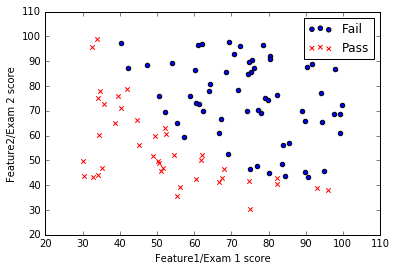

In [21]:
    %matplotlib inline
    from numpy import loadtxt, where ,array
    from pylab import scatter, show, legend, xlabel, ylabel  
      
    #load the dataset  
    data = loadtxt('dataset/data1.txt', delimiter=',')  
      
    X = data[:, 0:2]  
    y = data[:, 2]  
      
    pos = where(y == 1)  
    neg = where(y == 0)  
    scatter(X[pos, 0], X[pos, 1], marker='o', c='b')  
    scatter(X[neg, 0], X[neg, 1], marker='x', c='r')  
    xlabel('Feature1/Exam 1 score')  
    ylabel('Feature2/Exam 2 score')  
    legend(['Fail', 'Pass'])  
    show()  

下面我们写好计算sigmoid函数、代价函数、和梯度下降的程序：

In [22]:
    def sigmoid(X):  
        '''''Compute sigmoid function '''  
        den =1.0+ e **(-1.0* X)  
        gz =1.0/ den  
        return gz  
    def compute_cost(theta,X,y):  
        '''''computes cost given predicted and actual values'''  
        m = X.shape[0]#number of training examples  
        theta = reshape(theta,(len(theta),1))  
          
        J =(1./m)*(-transpose(y).dot(log(sigmoid(X.dot(theta))))- transpose(1-y).dot(log(1-sigmoid(X.dot(theta)))))  
          
        grad = transpose((1./m)*transpose(sigmoid(X.dot(theta))- y).dot(X))  
        #optimize.fmin expects a single value, so cannot return grad  
        return J[0][0]#,grad  
    def compute_grad(theta, X, y):  
        '''''compute gradient'''  
        theta.shape =(1,3)  
        grad = zeros(3)  
        h = sigmoid(X.dot(theta.T))  
        delta = h - y  
        l = grad.size  
        for i in range(l):  
            sumdelta = delta.T.dot(X[:, i])  
            grad[i]=(1.0/ m)* sumdelta *-1  
        theta.shape =(3,)  
        return  grad  

In [23]:
def predict(theta, X):  
        '''''Predict label using learned logistic regression parameters'''  
    m, n = X.shape  
    p = zeros(shape=(m,1))  
    h = sigmoid(X.dot(theta.T))  
    for it in range(0, h.shape[0]):  
        if h[it]>0.5:  
            p[it,0]=1  
        else:  
            p[it,0]=0  
    return p  
    #Compute accuracy on our training set  
p = predict(array(theta), it)  
print'Train Accuracy: %f'%((y[where(p == y)].size / float(y.size))*100.0)  

IndentationError: unindent does not match any outer indentation level (<ipython-input-23-3c3f6a6947d5>, line 3)

示例2.

第二份数据为data2.txt，部分内容如下：
<img width="145" height="340" alt="" src="http://img.blog.csdn.net/20151014125654926?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">
把数据的分布画出来
<img width="450" height="315" alt="" src="http://img.blog.csdn.net/20151014125725759?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">

我们发现在这个例子中，我们没有办法再用一条直线把两类样本点近似分开了，所以我们打算试试多项式的判定边界，那么我们先要对给定的两个feature做一个多项式特征的映射。比如说，我们做了如下的一个映射：
<img width="270" height="240" alt="" src="http://img.blog.csdn.net/20151014125802837?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center">

In [24]:
def map_feature(x1, x2):  
    ''''' 
    Maps the two input features to polonomial features. 
    Returns a new feature array with more features of 
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc... 
    '''  
    x1.shape =(x1.size,1)  
    x2.shape =(x2.size,1)  
    degree =6  
    mapped_fea = ones(shape=(x1[:,0].size,1))  
    m, n = mapped_fea.shape  
    for i in range(1, degree +1):  
        for j in range(i +1):  
            r =(x1 **(i - j))*(x2 ** j)  
            mapped_fea = append(<span style="font-family: Arial, Helvetica, sans-serif;">mapped_fea</span><span style="font-family: Arial, Helvetica, sans-serif;">, r, axis=1)</span>  
    return mapped_fea  
mapped_fea = map_feature(X[:,0], X[:,1]) 

SyntaxError: invalid syntax (<ipython-input-24-2c9596fb854e>, line 15)

# 总结

总结一下逻辑回归。
> * 它始于输出结果为有实际意义的连续值的线性回归，但是线性回归对于分类的问题没有办法准确而又具备鲁棒性地分割，因此我们设计出了逻辑回归这样一个算法，它的输出结果表征了某个样本属于某类别的概率。


> * 逻辑回归的成功之处在于，将原本输出结果范围可以非常大的θTX 通过sigmoid函数映射到(0,1)，从而完成概率的估测。


> * 而直观地在二维空间理解逻辑回归，是sigmoid函数的特性，使得判定的阈值能够映射为平面的一条判定边界，当然随着特征的复杂化，判定边界可能是多种多样的样貌，但是它能够较好地把两类样本点分隔开，解决分类问题。


> * 求解逻辑回归参数的传统方法是梯度下降，构造为凸函数的代价函数后，每次沿着偏导方向(下降速度最快方向)迈进一小部分，直至N次迭代后到达最低点。


7、补充

      本文的2份数据可在http://pan.baidu.com/s/1pKxJl1p上下载到，分别为data1.txt和data2.txt，欢迎大家自己动手尝试。

      关于逻辑回归的完整ipython notebook示例代码可以在我的github上(https://github.com/HanXiaoyang/ML_examples/tree/master/logistic_regression)下载到，欢迎指正。